# Phần 1: Giảm chiều và Trực quan hóa Vector

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random

glove_path = r"D:\10. ky1nam4\NLP\data\Glove\glove.6B.50d.txt"
def load_glove_model(file_path):
    print("Đang load model GloVe từ:", file_path)
    model = {}
    with open(file_path, encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            model[word] = vector
    print(f"Đã load {len(model)} từ!")
    return model

model = load_glove_model(glove_path)
words = random.sample(list(model.keys()), 40000)
vectors = np.array([model[w] for w in words])


Đang load model GloVe từ: D:\10. ky1nam4\NLP\data\Glove\glove.6B.50d.txt
Đã load 400000 từ!


In [2]:
# Giảm chiều bằng PCA và t-SNE
print("Đang giảm chiều bằng PCA")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)
print("Done PCA")

print("Đang giảm chiều bằng t-SNE")
tsne = TSNE(n_components=2, perplexity=40, n_iter=500, random_state=42)
tsne_result = tsne.fit_transform(vectors)
print("Done t-SNE")

Đang giảm chiều bằng PCA
Done PCA
Đang giảm chiều bằng t-SNE


d:\10. ky1nam4\NLP\venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Done t-SNE


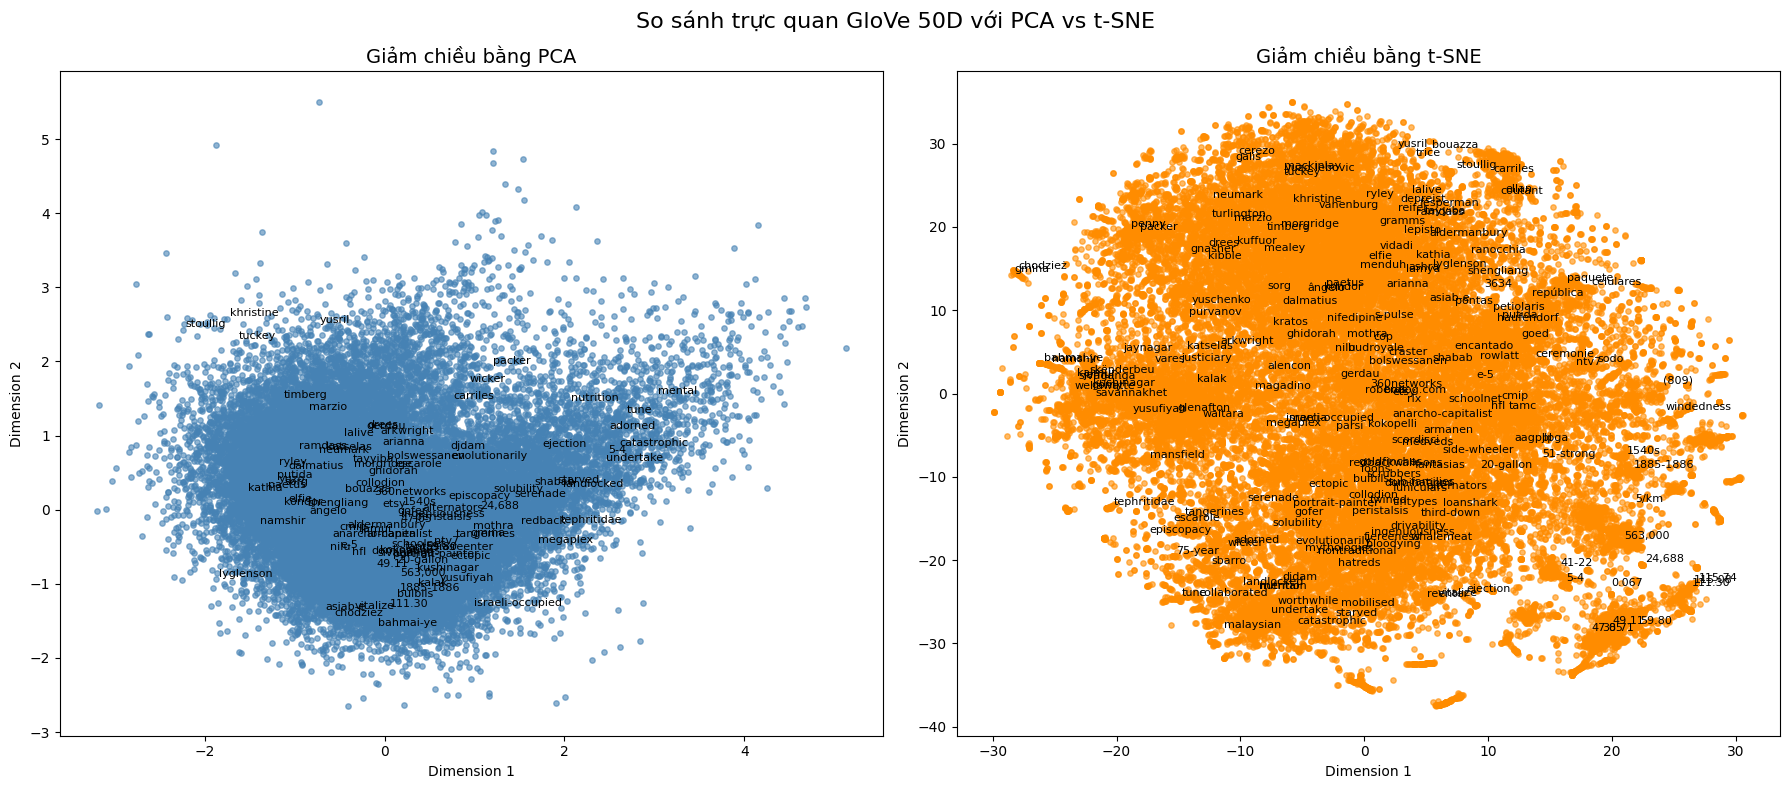

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# PCA
axes[0].scatter(pca_result[:, 0], pca_result[:, 1], s=15, alpha=0.6, color="steelblue")
for i, word in enumerate(words[:100]):
    axes[0].annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]),
                     xytext=(2, 2), textcoords="offset points", fontsize=8)
axes[0].set_title("Giảm chiều bằng PCA", fontsize=14)
axes[0].set_xlabel("Dimension 1")
axes[0].set_ylabel("Dimension 2")

# t-SNE
axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], s=15, alpha=0.6, color="darkorange")
for i, word in enumerate(words[:200]):
    axes[1].annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]),
                     xytext=(2, 2), textcoords="offset points", fontsize=8)
axes[1].set_title("Giảm chiều bằng t-SNE", fontsize=14)
axes[1].set_xlabel("Dimension 1")
axes[1].set_ylabel("Dimension 2")

plt.suptitle("So sánh trực quan GloVe 50D với PCA vs t-SNE", fontsize=16)
plt.tight_layout()
plt.show()

## ReportTasks

### Load mô hình GloVe
Mục tiêu: đọc file `glove.6B.50d.txt` và lưu toàn bộ word vector vào một dictionary.

- Mỗi dòng trong file chứa 1 từ và 50 số thực → vector biểu diễn của từ đó.  
- Hàm `load_glove_model()` duyệt từng dòng, tách từ và vector, rồi lưu vào `model[word] = vector`.  
- In ra số lượng từ đã load được để kiểm tra.


### Giảm chiều dữ liệu (PCA và t-SNE)
Mục tiêu: giảm từ 50 chiều xuống 2 chiều để trực quan hóa.
Sử dụng PCA và t-SNE
Ta chọn ngẫu nhiên 500 từ, lấy vector tương ứng và áp dụng PCA + t-SNE để giảm chiều xuống 2D.


### Trực quan hóa kết quả
Mục tiêu: hiển thị các từ trong không gian 2D.

- Dùng `matplotlib` để vẽ **hai biểu đồ cạnh nhau**:  
  + Biểu đồ trái: kết quả PCA  
  + Biểu đồ phải: kết quả t-SNE  
- Mỗi điểm là một từ, hiển thị nhãn cho ~100 từ đầu tiên.  
- Giúp quan sát mối quan hệ ngữ nghĩa:  
  + Các từ tương tự sẽ gần nhau trên biểu đồ (đặc biệt rõ trong t-SNE).  